### IMPORTING GOOGLE DRIVE FOR DATASET

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###IMPORTING REQUIRED LIBRARIES

In [39]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, Flatten, MaxPool2D, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

###LOADING THE DATA

In [40]:

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)



training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/train',
                                                 target_size=(127,127),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 1009 images belonging to 2 classes.


In [41]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory('/content/gdrive/My Drive/Dataset/test', target_size = (127,127), batch_size = 32, class_mode = 'binary')

Found 185 images belonging to 2 classes.


###CREATING THE MODEL

####ADDING CONVOLUTIONAL LAYER

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(32, activation = 'relu', kernel_size = 3, input_shape = [127,127,3]))
model.add(BatchNormalization())

model.add(Conv2D(32, activation = 'relu', kernel_size = 3))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, activation = 'relu', kernel_size = 3))
model.add(BatchNormalization())

model.add(Conv2D(64, activation = 'relu', kernel_size = 3))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size = (2,2)))

####ADDING FC LAYER

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', metrics = 'accuracy', loss = 'binary_crossentropy')

###SUMMARY OF THE CNN MODEL

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 125, 125, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 125, 125, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 123, 123, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 59, 59, 64)       

###TRAINING AND VALIDATING THE MODEL

In [47]:
model.fit(x=training_set,epochs = 50, validation_data =validation_set)

Epoch 1/50
32/32 [==============================] - 15s 458ms/step - loss: 1.1085 - accuracy: 0.8365 - val_loss: 0.6000 - val_accuracy: 0.7784
Epoch 2/50
32/32 [==============================] - 15s 455ms/step - loss: 0.7106 - accuracy: 0.8692 - val_loss: 3.1556 - val_accuracy: 0.7622
Epoch 3/50
32/32 [==============================] - 15s 460ms/step - loss: 0.6012 - accuracy: 0.8900 - val_loss: 0.7298 - val_accuracy: 0.6919
Epoch 4/50
32/32 [==============================] - 14s 446ms/step - loss: 0.3805 - accuracy: 0.8949 - val_loss: 0.7400 - val_accuracy: 0.7838
Epoch 5/50
32/32 [==============================] - 14s 439ms/step - loss: 0.5579 - accuracy: 0.8840 - val_loss: 5.9859 - val_accuracy: 0.7622
Epoch 6/50
32/32 [==============================] - 14s 442ms/step - loss: 0.2845 - accuracy: 0.9108 - val_loss: 2.0972 - val_accuracy: 0.7730
Epoch 7/50
32/32 [==============================] - 14s 442ms/step - loss: 0.2342 - accuracy: 0.9167 - val_loss: 1.1135 - val_accuracy: 0.8000

###TESTING THE MODEL

In [48]:
test_list = ['w_m_2.jpg','wo_m_1.jpg']
def test(i):
  show_img = image.load_img(i)
  plt.imshow(show_img)
  test_image = image.load_img(i, target_size = (127,127,3))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  answer = cnn.predict_classes(test_image)
  training_set.class_indices
  if result[0][0]==1:
      prediction = 'mask'
  else :
      prediction = 'unmask'
  print(prediction)

mask


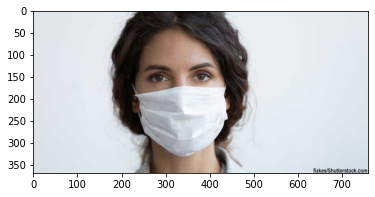

In [49]:
test(test_list[0])

unmask


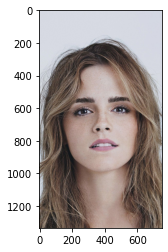

In [50]:
test(test_list[1])